**Miljødataanalyse**   
 
Denne notebooken samler visualisering, statistisk analyse og prediktiv modellering i en oversiktlig fremstilling.

In [1]:
import os
import sys
sys.path.append(os.path.abspath("../src"))

import pandas as pd
from datetime import datetime
from fetch_data import fetch_data_from_frost
from process_data import process_and_clean_data
from visualize_data import plot_histogram
from visualize_data import plot_scatterplot
from regression_model import train_model_for_city
from visualize_data import (
    plot_temperature_trend,
    plot_environmental_factors,
    plot_precipitation,
    plot_wind_speed
)
from analyze_data import (
    print_basic_statistics,
    print_correlation,
    plot_distribution,
    print_skewness
)

# Les inn datasettet
file_path = '../data/weekly_weather_data.csv'
df = pd.read_csv(file_path)
df['Time'] = pd.to_datetime(df['Time'])
print("Data loaded")

/Users/eier/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Data loaded


Temperatur utvikling for byene - Steinkjer, Molde & Ålesund

In [2]:
plot_temperature_trend(df)
plot_environmental_factors(df)
plot_precipitation(df)
plot_wind_speed(df)

KeyError: 'elementId'

<Figure size 1200x600 with 0 Axes>

Statistisk analyse

In [39]:
print_basic_statistics(df)
print_correlation(df)
print_skewness(df)
plot_distribution(df, "Air temperature (°C)")


Descriptive statistics (temperature, precipitation, wind, humidity):

Air Temperature (°C):
  Mean:      6.26
  Median:    5.90
  Std. dev.: 6.84

Precipitation (mm):
  Mean:      4.46
  Median:    0.60
  Std. dev.: 8.50

Wind Speed (m/s):
  Mean:      2.10
  Median:    1.80
  Std. dev.: 1.25

Relative Humidity (%):
  Mean:      78.79
  Median:    81.00
  Std. dev.: 12.86

Correlation between temperature and other variables:
  Temp vs. Humidity: -0.05
  Temp vs. Wind Speed: -0.21
  Temp vs. Precipitation: -0.01

Skewness in key variables:
  Temperature: -0.12
  Wind Speed: 2.04
  Precipitation: 3.39
  Humidity: -0.68
No data found for: Air temperature (°C)


Histogram

In [40]:
plot_histogram(df, "mean(air_temperature P1D)", "Air Temperature (°C)")
plot_histogram(df, "mean(relative_humidity P1D)", "Relative Humidity (%)")

Prediktiv analyse - lineær regresjon per by


Training model for Steinkjer...
R² score for Steinkjer: 0.25
MSE for Steinkjer: 103.71


/Users/eier/Documents/GitHub/Miljo-dataanalyse#/src/visualize_data.py:120: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.



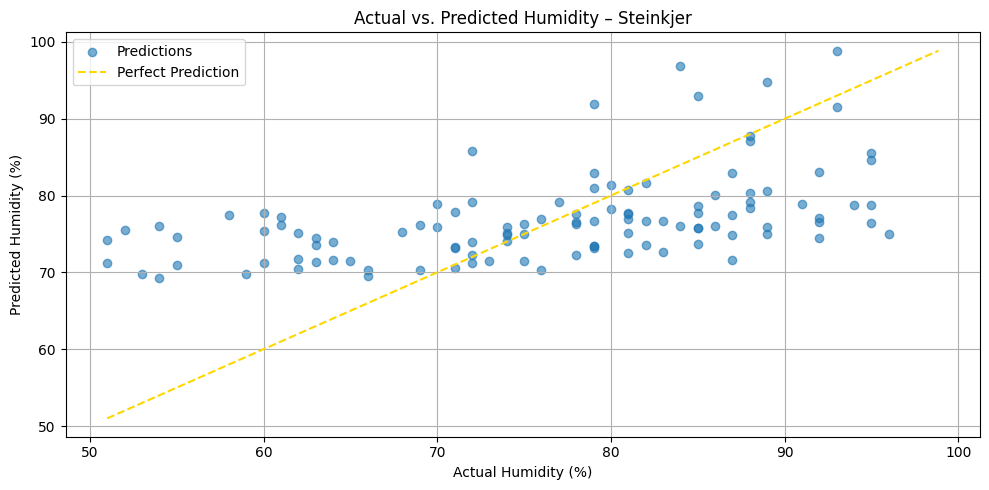


Training model for Molde...
R² score for Molde: 0.12
MSE for Molde: 126.67


/Users/eier/Documents/GitHub/Miljo-dataanalyse#/src/visualize_data.py:120: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.



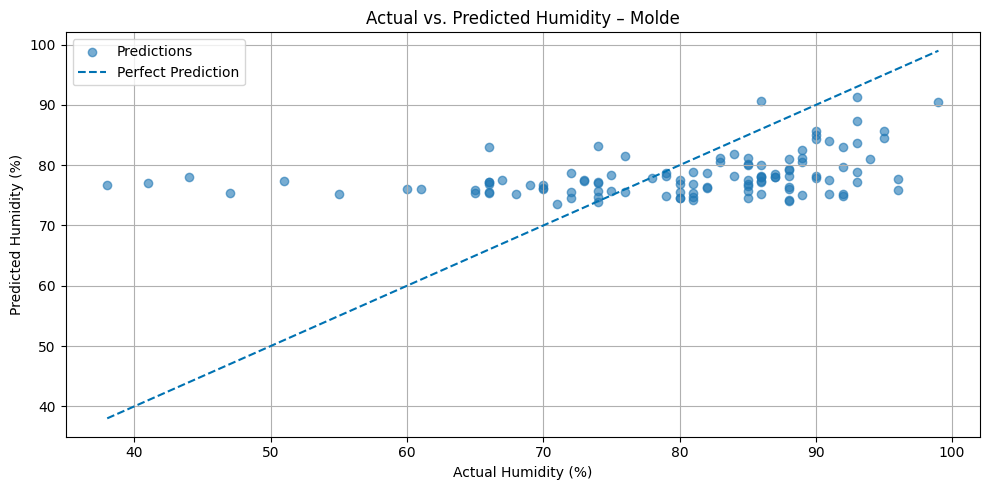


Training model for Ålesund...
R² score for Ålesund: 0.05
MSE for Ålesund: 141.47


/Users/eier/Documents/GitHub/Miljo-dataanalyse#/src/visualize_data.py:120: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.



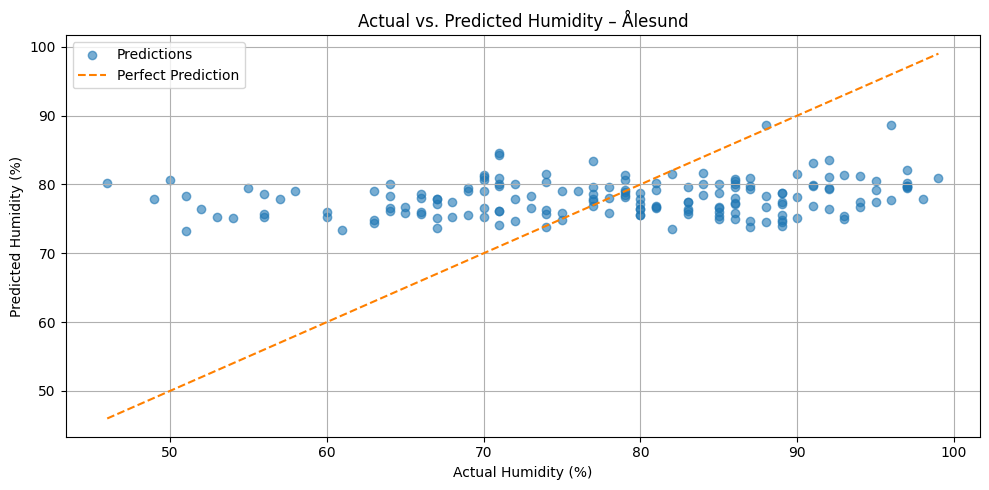

In [41]:
for city in df['Location'].unique():
    model, y_test, y_pred = train_model_for_city(df, city)
    plot_scatterplot(y_test, y_pred, city)